In [10]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [11]:
#hide
# !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [12]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [13]:
key = os.environ.get('AZURE_SEARCH_KEY', 'e2f63bb493a545bdb14b7ca213e99d73')

In [14]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [15]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

150

In [16]:
bear_types = 'grizzly','black','teddy'
path = Path('Datasets/bear_samples')

In [17]:

    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [28]:
fns = get_image_files(path)
fns

(#472) [Path('Datasets/bear_samples/black/00000044.jpeg'),Path('Datasets/bear_samples/black/00000133.jpg'),Path('Datasets/bear_samples/black/00000038.jpg'),Path('Datasets/bear_samples/black/00000050.jpg'),Path('Datasets/bear_samples/black/00000031.jpg'),Path('Datasets/bear_samples/black/00000032.jpg'),Path('Datasets/bear_samples/black/00000146.jpg'),Path('Datasets/bear_samples/black/00000136.JPG'),Path('Datasets/bear_samples/black/00000135.jpg'),Path('Datasets/bear_samples/black/00000060.jpg')...]

In [29]:
failed = verify_images(fns)
failed

(#0) []

In [30]:
failed.map(Path.unlink);

In [31]:
??verify_images

In [32]:
??get_image_files

In [33]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [34]:
dls = bears.dataloaders(path)

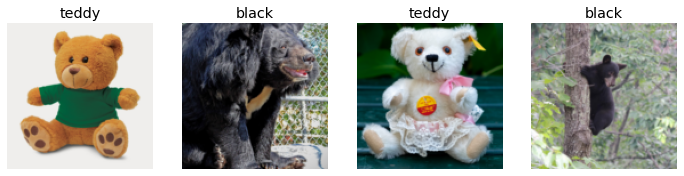

In [35]:
dls.valid.show_batch(max_n=4, nrows=1)

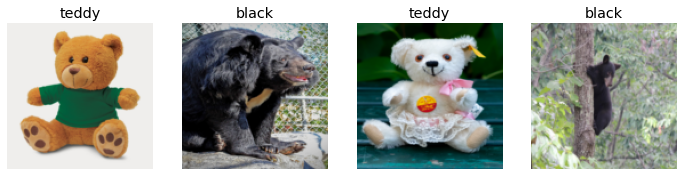

In [36]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

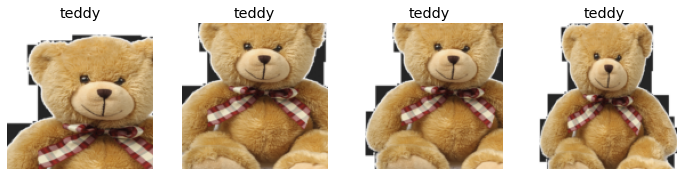

In [37]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [39]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [40]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/slabban/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/home/slabban/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448234945/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.325204,0.152867,0.074468,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.159430,0.029102,0.010638,00:14
1,0.109167,0.033591,0.010638,00:12
2,0.079200,0.026637,0.010638,00:12
3,0.064945,0.023365,0.010638,00:12


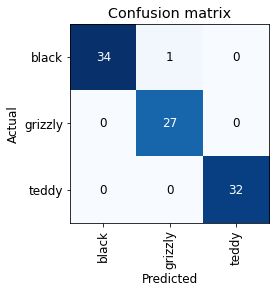

In [41]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

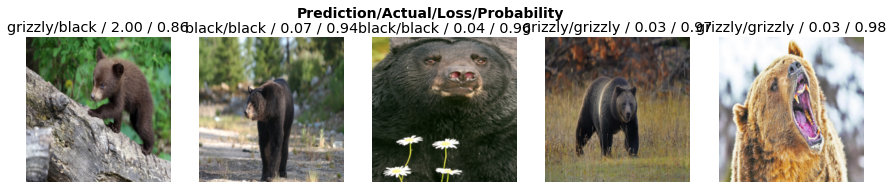

In [42]:
interp.plot_top_losses(5, nrows=1)

In [43]:
learn.export()

In [44]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [46]:
# Load the the trained model (inference)
# learn_inf = load_learner(path/'export.pkl')

In [45]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

/home/slabban/anaconda3/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/slabban/anaconda3/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
#Use this to delete selected images from the cleaner
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)